In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from data.dataset_enhancer import get_movies

### 0. Data Enhancement

First we ran the notebook data_preprocessing.ipynb to generate the necessary files for this notebook. The data_preprocessing.ipynb notebook loads the movie metadata and additional datasets, preprocesses the data, and saves the cleaned data to CSV files. The data_preprocessing.ipynb notebook also generates the necessary files for this notebook, such as the movie metadata for older and newer movies, and additional datasets for sequels, books, comics, remakes, and collections. There is no need to run it again, as the files are already on github. The data_preprocessing.ipynb notebook is run once to generate the necessary files for this notebook. You also need an API key, that we are not putting on github for security reasons.
The function stores the output in the data file.

In [2]:
"""keywords_name = ["sequels", "book", "comics", "remake"]
keywords_id = [9663, 818, 9717, 9714]
start_date = 1880
end_date = 2010

get_movies(keywords_name, keywords_id, start_date, end_date)

start_date = 2010
end_date = 2024
get_movies(keywords_name, keywords_id, start_date, end_date)"""

'keywords_name = ["sequels", "book", "comics", "remake"]\nkeywords_id = [9663, 818, 9717, 9714]\nstart_date = 1880\nend_date = 2010\n\nget_movies(keywords_name, keywords_id, start_date, end_date)\n\nstart_date = 2010\nend_date = 2024\nget_movies(keywords_name, keywords_id, start_date, end_date)'

## 1. Files loading and preprocessing

The following cell organizes and preprocesses movie datasets from different time periods (1880–2010 and 2010–2024) using the MovieFrames class. It first imports the class, then loads the movie metadata for older and newer movies. File paths for additional datasets (such as sequels, books, comics, remakes, and collections) are dynamically generated for both time periods. The MovieFrames objects (movie_frames_old and movie_frames_new) are then created to structure and preprocess the data. The movie_frames_old object specifically standardizes column names for the older dataset using the old=True flag. These objects help manage movie data by categories and prepare it for further analysis.

### 1.1 Data Collection

In [3]:
from src.models.movies_frame import MovieFrames

movie_df = pd.read_csv('data/MovieSummaries_filtered/movie_df.csv')
        
new_movie_df = pd.read_csv('data/random_sample/random_sample_2010_2024_metadata.csv')

keywords = ["sequels", "book", "comics", "remake"]
path_old = []
path_new = []

for keyword in keywords:
    path_old.append(f"data/{keyword}/{keyword}_1880_2010_with_wiki_id.csv")
    path_new.append(f"data/{keyword}/{keyword}_2010_2024_metadata.csv")

path_old.append("data/collections/sequels_and_original_1880_2010_with_wiki_id.csv")
path_new.append("data/collections/sequels_and_original_2010_2024_metadata.csv")

movie_frames_old = MovieFrames(movie_df, path_old, 1880, 2010)
movie_frames_new = MovieFrames(new_movie_df, path_new, 2010, 2024)


### 1.2 Data Preprocessing

Then the following cell visualizes the size differences between datasets during the preprocessing steps using the display_data_cleaning_graph function. The function takes a MovieFrames object and calculates the number of movies at three stages:

- The original data loaded from TMDb.
- After matching the TMDb data with the Wikipedia data.
- After filtering out movies with mismatched release years.

These sizes are passed to the create_graph function, which generates a bar graph showing the changes in dataset sizes for five categories: sequel collections, sequels, books, comics, and remakes. The graph highlights how the preprocessing steps affect the number of movies in each category. 

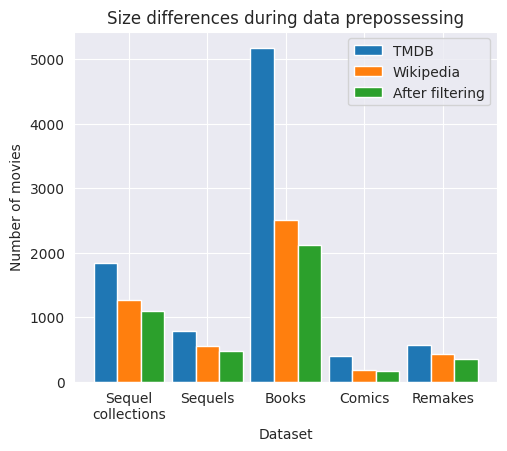

In [4]:
## Size differences
from src.models.movie_data_cleaner import display_data_cleaning_graph
fig = display_data_cleaning_graph(movie_frames_old)

plt.show()

### 2.1 How many sequels are there compared to movies 

Groups the movies by 5-year intervals, counts how many movies fall into each interval, and returns the string representation of the interval labels. The first cell shows the result for data between 1880 and 2010, the second cell will show results between 2010-2024 when it will work.

Plot of number of movies per 5 year (left figure) VS. Plot of number of movies with sequels per 5 year (right figure)

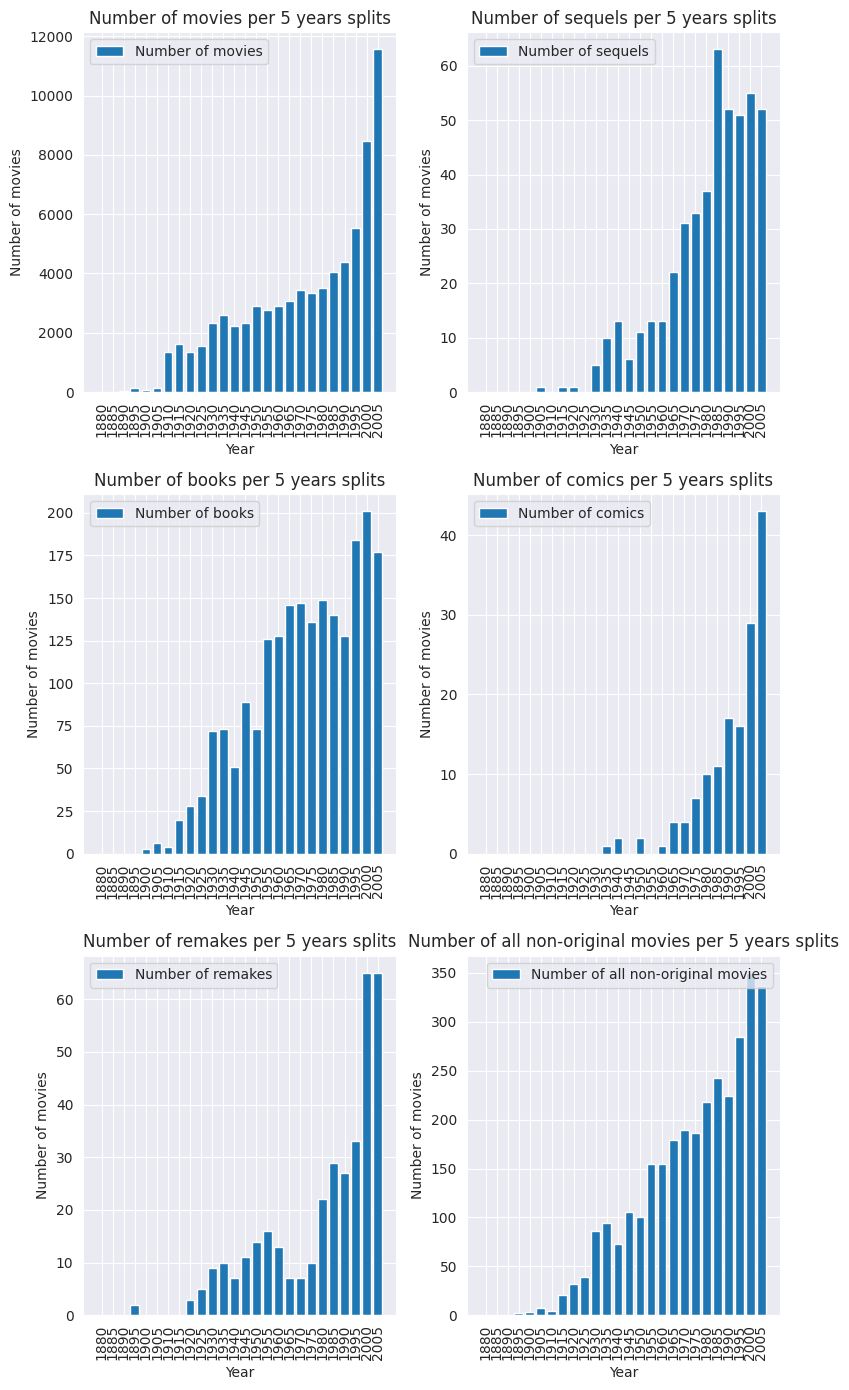

In [5]:
from src.models.movie_counter import get_movie_counter_figure

#Plot figure 1 (left):  number of movies per 5 years
fig = get_movie_counter_figure(movie_frames_old)

plt.tight_layout()
plt.show()

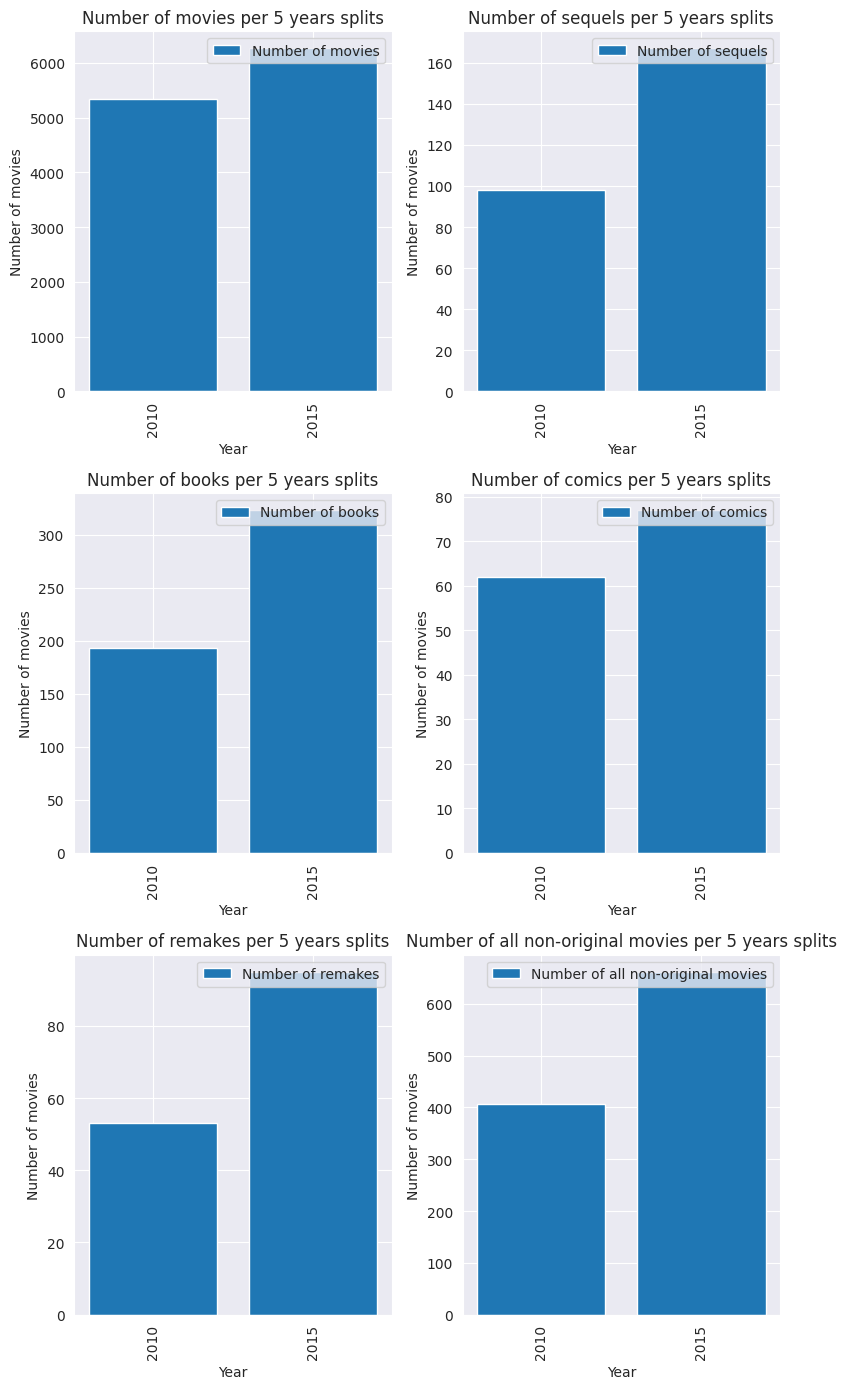

In [6]:
fig = get_movie_counter_figure(movie_frames_new, split=5)
plt.tight_layout()
plt.show()

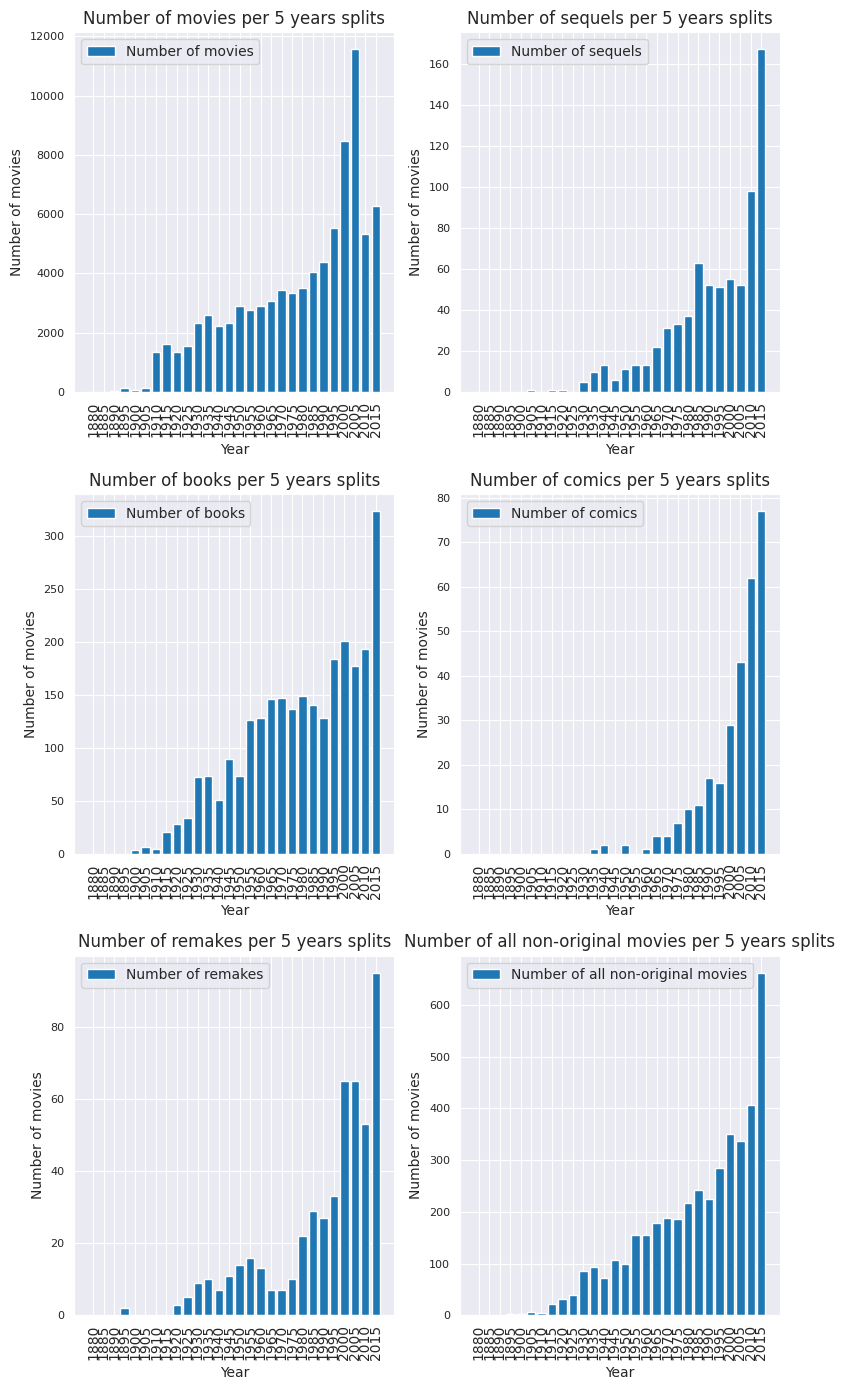

In [17]:
from models.movie_counter import get_merge_movie_counter_figure

fig = get_merge_movie_counter_figure(movie_frames_old, movie_frames_new, split=5)
plt.tight_layout()

### 1.3 Ratio of sequels to original movies



Calculation and plot of the ratio between movies with sequel and the number of movies, both per 5 years.


$$
\text{Ratio} = \frac{\text{nb of movie with sequel per 5 year}}{\text{nb of movie per 5 year}}
$$

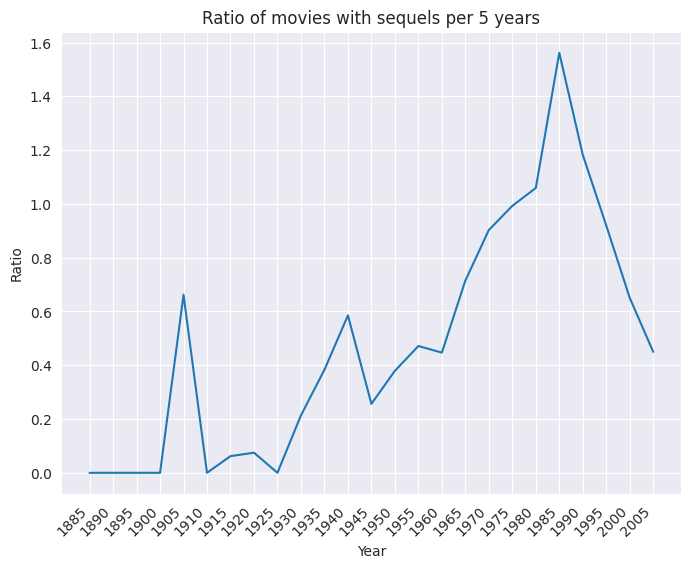

In [8]:

from src.models.movie_counter import get_ratio_movie_figure

fig = get_ratio_movie_figure(movie_frames_old)
plt.xticks(rotation=45, ha='right')
plt.show()

## 3.1 Box office revenue

#### 3.1.1 Box office revenue for movies with sequels compared to all movies

/home/yann/Documents/ada-2024-project-onceuponatimeindata/src/models/movies_frame.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.movie_df[column_name] = column_values


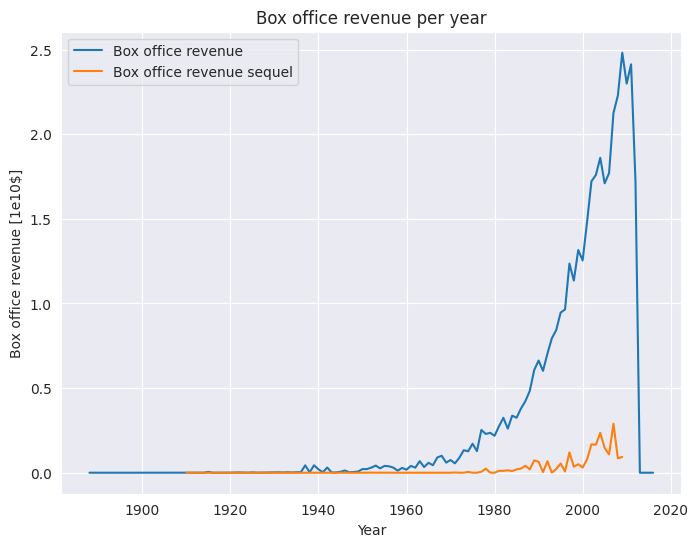

In [9]:
from src.models.box_office_revenue import get_box_office_absolute

# Plot figure 4: box office revenue per year
get_box_office_absolute(movie_frames_old)
plt.show()

Calculation and plots the percentage of box office revenue each year contributed by movies with sequels, relative to the total box office revenue for all movies that year

$$
\text{Box Office \%} = \frac{\text{Box office of movies with sequel per year}}{\text{Box office for all movies per year}} * 100
$$

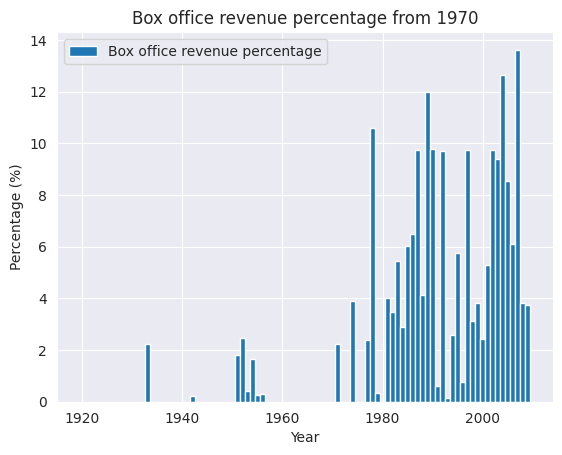

In [10]:
from src.models.box_office_revenue import get_box_office_ratio

fig = get_box_office_ratio(movie_frames_old)
plt.show()

Calculation and plot of the average inflation-adjusted box office revenue per year, both for all movies and for movies with sequels

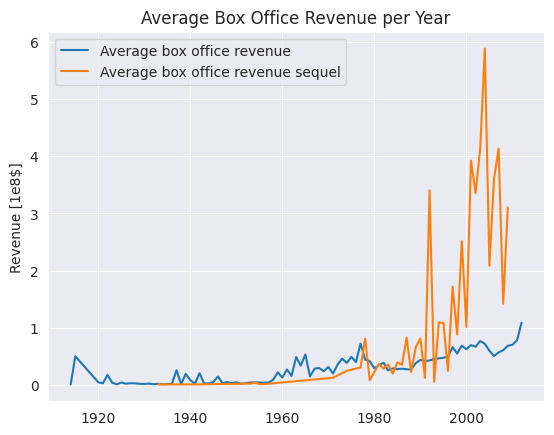

In [11]:
from src.models.box_office_revenue import get_average_box_office_revenue

get_average_box_office_revenue(movie_frames_old)
plt.show()

#### 3.1.2 Box office revenue for movies with sequel compared to the first movie of the collection

This plot shows the box office revenue for the first movie in a collection compared to the sequels. The x-axis represents the collection, and the y-axis is the box office revenue. On the left side, the box office of the entire serie following the first movie is seen, and on the right side, the average box office of the sequels is compared to the first. Improving sequels are linked in green, and decreasing sequels are linked in red.

compare_first_sequel splits the movies into first movies and sequels, calculates the box office revenue for each movie, and then plots the data.


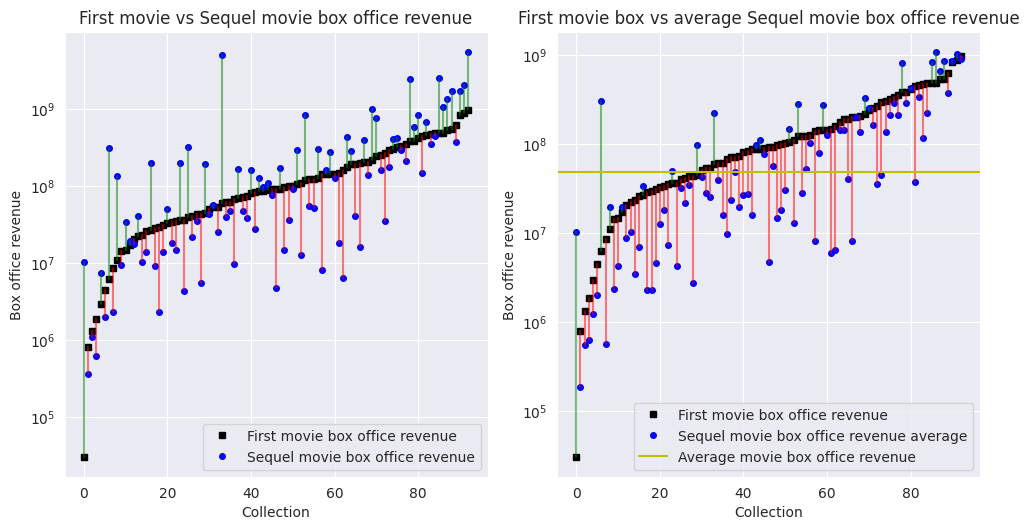

In [12]:
from src.models.box_office_revenue import compare_first_sequel

fig = compare_first_sequel(movie_frames_old)

plt.tight_layout()
plt.show()


These plots highlight where the first movie outperforms the sequel (red lines) and vice versa (green lines). The second plot also includes a yellow horizontal line showing the average box office revenue of all movies in the dataset.

The log scale on the y-axis is used to better visualize large differences in revenue, especially when there are very high values.

## 4. Number of movies in a collection

A plot of the comparison between the budget and the box office revenue for collection. The x-axis is the budget and the y-axis is the revenue. The size of the circles is proportional to the number of movies in the collection. 
get_budget_vs_revenue first computes the box office revenue and budget for each movie in the collection, then calculates the total box office revenue and budget for the collection. The budget is our first use of the extended data which wasn't in the original database, but was given by the TMDB API. The function then plots the data.



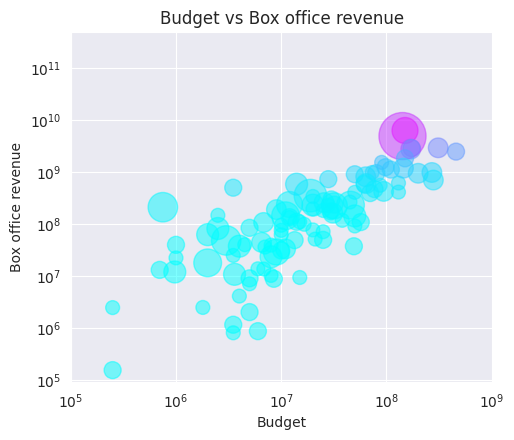

In [13]:
from src.models.collection_analysis import get_budget_vs_revenue
import seaborn as sns

get_budget_vs_revenue(movie_frames_old, "data/sequels/sequels_1880_2010_extended.csv")
plt.show()

### 5. Time between sequels

This graph displays the time occured between sequels in a collection. The x-axis represents the number of years between sequels, and the y-axis is the collection. The size of the circles is proportional to the box office revenue of the movie. The link between each film . The graph helps identify patterns in the time between sequels and the revenue generated by each sequel.

get_time_between_sequels first separates the movies between first movie and the following sequels, creates a dataframe with the movies in each collection, their release date and the box office revenue. It then calculates the time between sequels. Then it draws the graph.

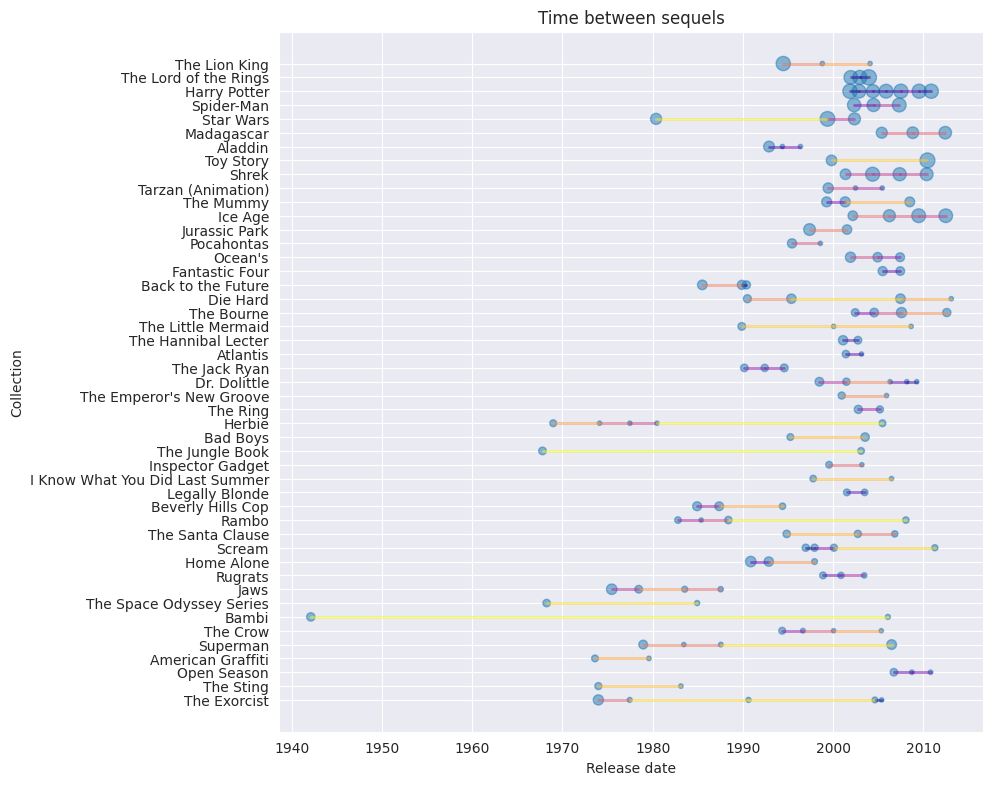

In [14]:
from src.models.collection_analysis import get_time_between_sequels

fig = get_time_between_sequels(movie_frames_old)
plt.show()

## Other line of enquiry:

- Highest grossing series
- By genre
- Find studios that do a lot of sequels
- Is there a correlation between the box office revenue of the first movie and the sequels
- Add more box office revenue data and get movie budget data
- ...